Generating customer data...

Exploring and cleaning data...

=== Data Overview ===
   CustomerID  Age  AnnualIncome  SpendingScore  OnlineFrequency
0           1   56     81.832343             59                2
1           2   69     65.486979             54                5
2           3   46     27.209451             48                5
3           4   32     42.736489             43                4
4           5   60     69.003667             46                7

=== Data Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       500 non-null    int64  
 1   Age              500 non-null    int32  
 2   AnnualIncome     500 non-null    float64
 3   SpendingScore    500 non-null    int32  
 4   OnlineFrequency  500 non-null    int32  
dtypes: float64(1), int32(3), int64(1)
memory usage: 13.8 KB
None

=== Desc

C:\Users\dines\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dines\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dines\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\dines\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

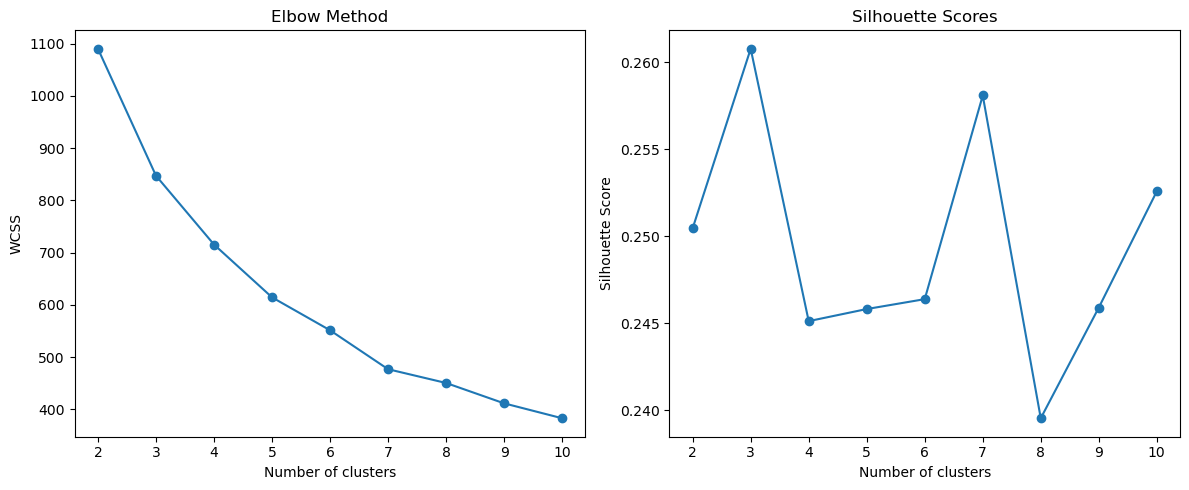


Performing clustering with 4 clusters...

Analyzing and visualizing results...

=== Cluster Statistics ===
               Age  AnnualIncome  SpendingScore  OnlineFrequency
Cluster                                                         
0        44.853147     37.506881      41.587413         3.237762
1        42.252252     60.845627      77.873874         5.045045
2        44.283019     41.476711      47.452830         7.688679
3        45.132353     59.153925      31.602941         4.558824


C:\Users\dines\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


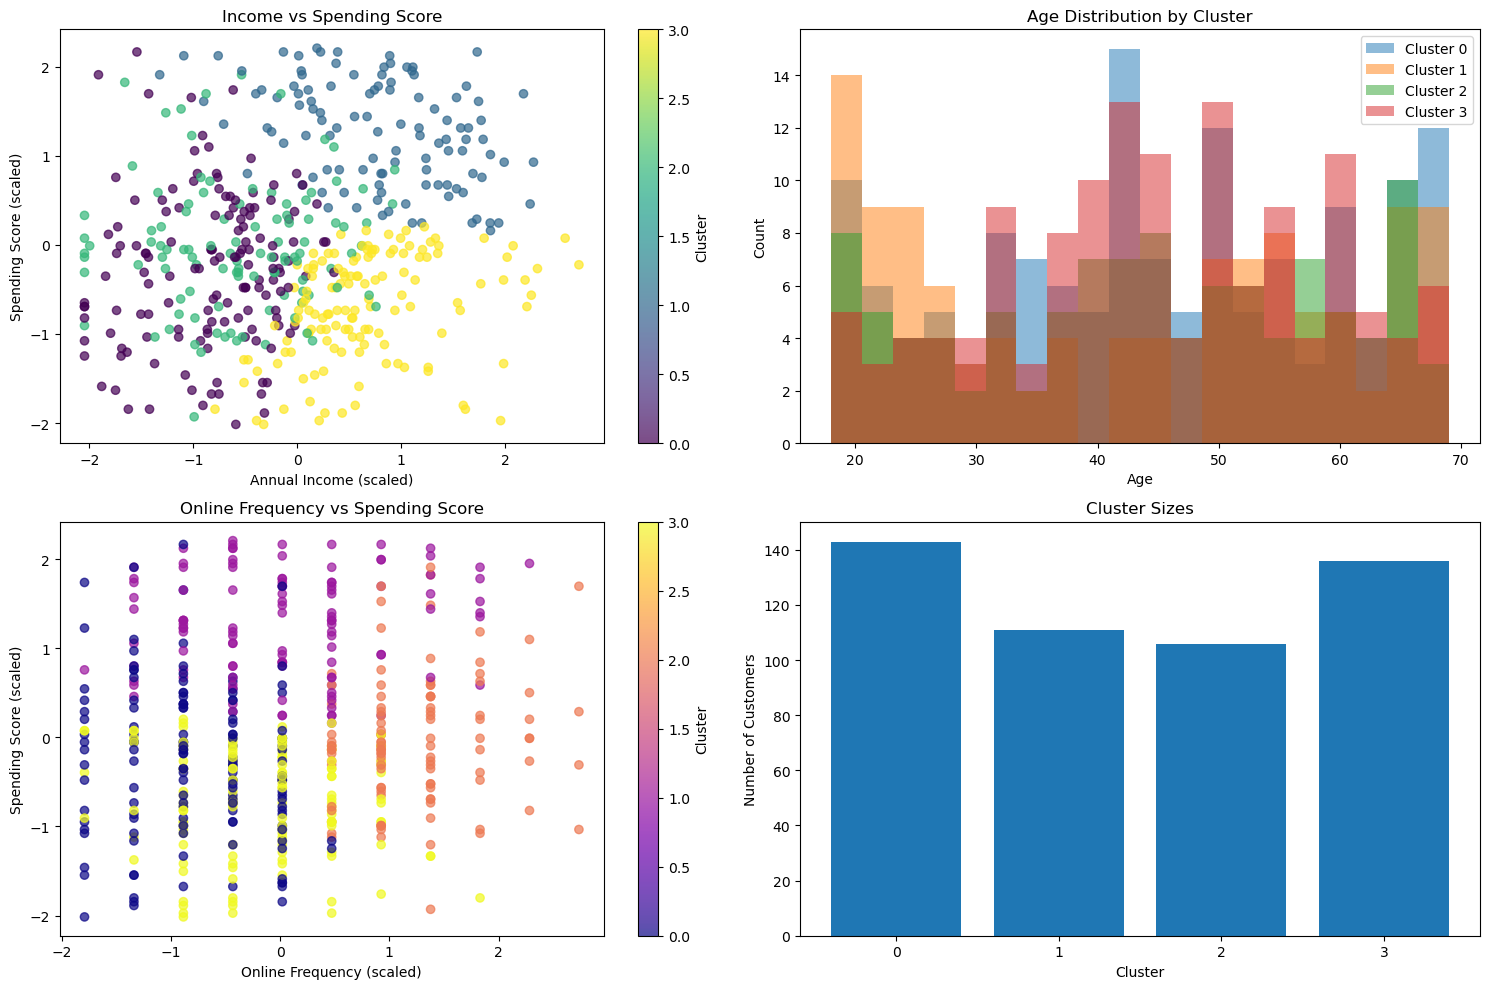


Clustered data saved to 'clustered_customers.csv'

=== Project Completed Successfully ===


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Generate synthetic customer data
def generate_customer_data(num_customers=300):
    """
    Generate synthetic customer data with:
    - Customer ID
    - Age
    - Annual Income (k$)
    - Spending Score (1-100)
    - Online Purchase Frequency (times/month)
    """
    # Generate base data
    ages = np.random.randint(18, 70, size=num_customers)
    incomes = np.random.normal(50, 15, num_customers).clip(20, 120)
    spending_scores = np.random.randint(1, 101, size=num_customers)
    online_freq = np.random.poisson(5, size=num_customers).clip(1, 20)
    
    # Create some meaningful clusters artificially
    # Cluster 1: Young high spenders
    mask1 = (ages < 30) & (incomes > 60)
    spending_scores[mask1] = np.random.randint(70, 96, size=mask1.sum())
    
    # Cluster 2: Middle-aged savers
    mask2 = (ages >= 30) & (ages < 50) & (incomes < 60)
    spending_scores[mask2] = np.random.randint(20, 50, size=mask2.sum())
    
    # Cluster 3: Retired with medium spending
    mask3 = (ages >= 60)
    spending_scores[mask3] = np.random.randint(40, 70, size=mask3.sum())
    
    # Create DataFrame
    data = pd.DataFrame({
        'CustomerID': range(1, num_customers + 1),
        'Age': ages,
        'AnnualIncome': incomes,
        'SpendingScore': spending_scores,
        'OnlineFrequency': online_freq
    })
    
    return data

# Step 2: Data Exploration and Cleaning
def explore_and_clean_data(df):
    """Explore and clean the customer data"""
    print("\n=== Data Overview ===")
    print(df.head())
    
    print("\n=== Data Information ===")
    print(df.info())
    
    print("\n=== Descriptive Statistics ===")
    print(df.describe())
    
    # Check for missing values
    print("\n=== Missing Values ===")
    print(df.isnull().sum())
    
    # Check for outliers using z-score
    numeric_cols = ['Age', 'AnnualIncome', 'SpendingScore', 'OnlineFrequency']
    z_scores = stats.zscore(df[numeric_cols])
    outliers = (np.abs(z_scores) > 3).any(axis=1)
    print(f"\nNumber of outliers detected: {outliers.sum()}")
    
    # Remove outliers
    df_clean = df[~outliers].copy()
    print(f"Data shape after removing outliers: {df_clean.shape}")
    
    return df_clean

# Step 3: Feature Engineering and Scaling
def prepare_features(df):
    """Prepare features for clustering"""
    # Select relevant features
    features = df[['AnnualIncome', 'SpendingScore', 'OnlineFrequency']]
    
    # Scale the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    
    return scaled_features, features

# Step 4: Determine Optimal Number of Clusters
def find_optimal_clusters(data, max_k=10):
    """Find optimal number of clusters using elbow method and silhouette score"""
    wcss = []  # Within-Cluster Sum of Square
    silhouette_scores = []
    
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
        
        if k > 1:  # Silhouette score requires at least 2 clusters
            silhouette_scores.append(silhouette_score(data, kmeans.labels_))
    
    # Plot elbow curve
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(range(2, max_k + 1), wcss, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
    plt.title('Silhouette Scores')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    
    plt.tight_layout()
    plt.show()
    
    return wcss, silhouette_scores

# Step 5: Perform Clustering
def perform_clustering(data, n_clusters=4):
    """Perform K-Means clustering"""
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data)
    
    return clusters, kmeans

# Step 6: Analyze and Visualize Results
def analyze_and_visualize(df, clusters, features):
    """Analyze and visualize the clustering results"""
    # Add cluster labels to original data
    df['Cluster'] = clusters
    
    # Cluster statistics
    print("\n=== Cluster Statistics ===")
    cluster_stats = df.groupby('Cluster')[['Age', 'AnnualIncome', 'SpendingScore', 'OnlineFrequency']].mean()
    print(cluster_stats)
    
    # Visualization
    plt.figure(figsize=(15, 10))
    
    # Plot 1: Income vs Spending Score
    plt.subplot(2, 2, 1)
    scatter = plt.scatter(features[:, 0], features[:, 1], c=clusters, cmap='viridis', alpha=0.7)
    plt.title('Income vs Spending Score')
    plt.xlabel('Annual Income (scaled)')
    plt.ylabel('Spending Score (scaled)')
    plt.colorbar(scatter, label='Cluster')
    
    # Plot 2: Age Distribution by Cluster
    plt.subplot(2, 2, 2)
    for cluster in sorted(df['Cluster'].unique()):
        cluster_data = df[df['Cluster'] == cluster]
        plt.hist(cluster_data['Age'], bins=20, alpha=0.5, label=f'Cluster {cluster}')
    plt.title('Age Distribution by Cluster')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.legend()
    
    # Plot 3: Online Frequency vs Spending Score
    plt.subplot(2, 2, 3)
    scatter = plt.scatter(features[:, 2], features[:, 1], c=clusters, cmap='plasma', alpha=0.7)
    plt.title('Online Frequency vs Spending Score')
    plt.xlabel('Online Frequency (scaled)')
    plt.ylabel('Spending Score (scaled)')
    plt.colorbar(scatter, label='Cluster')
    
    # Plot 4: Cluster Sizes
    plt.subplot(2, 2, 4)
    cluster_counts = df['Cluster'].value_counts().sort_index()
    plt.bar(cluster_counts.index.astype(str), cluster_counts.values)
    plt.title('Cluster Sizes')
    plt.xlabel('Cluster')
    plt.ylabel('Number of Customers')
    
    plt.tight_layout()
    plt.show()
    
    return df

# Main execution
if __name__ == "__main__":
    # Step 1: Generate data
    print("Generating customer data...")
    customer_data = generate_customer_data(500)
    
    # Step 2: Explore and clean data
    print("\nExploring and cleaning data...")
    clean_data = explore_and_clean_data(customer_data)
    
    # Step 3: Prepare features
    print("\nPreparing features for clustering...")
    scaled_features, original_features = prepare_features(clean_data)
    
    # Step 4: Find optimal clusters
    print("\nDetermining optimal number of clusters...")
    wcss, silhouette_scores = find_optimal_clusters(scaled_features)
    
    # Based on the plots, choose the optimal number of clusters
    optimal_clusters = 4  
    
    # Step 5: Perform clustering
    print(f"\nPerforming clustering with {optimal_clusters} clusters...")
    cluster_labels, kmeans_model = perform_clustering(scaled_features, optimal_clusters)
    
    # Step 6: Analyze and visualize
    print("\nAnalyzing and visualizing results...")
    clustered_data = analyze_and_visualize(clean_data, cluster_labels, scaled_features)
    
    # Save the clustered data
    clustered_data.to_csv('clustered_customers.csv', index=False)
    print("\nClustered data saved to 'clustered_customers.csv'")
    
    print("\n=== Project Completed Successfully ===")

Generating customer data...

Exploring and cleaning data...

=== Data Overview ===
   CustomerID   Age  AnnualIncome  SpendingScore  OnlineFrequency
0         1.0  56.0     81.832343           59.0              2.0
1         2.0  69.0     65.486979           54.0              5.0
2         3.0  46.0     27.209451           48.0              5.0
3         4.0  32.0     42.736489           43.0              4.0
4         5.0  60.0     69.003667           46.0              7.0

=== Data Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       500 non-null    float64
 1   Age              500 non-null    float64
 2   AnnualIncome     500 non-null    float64
 3   SpendingScore    500 non-null    float64
 4   OnlineFrequency  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB
None

=== Descriptive Statis

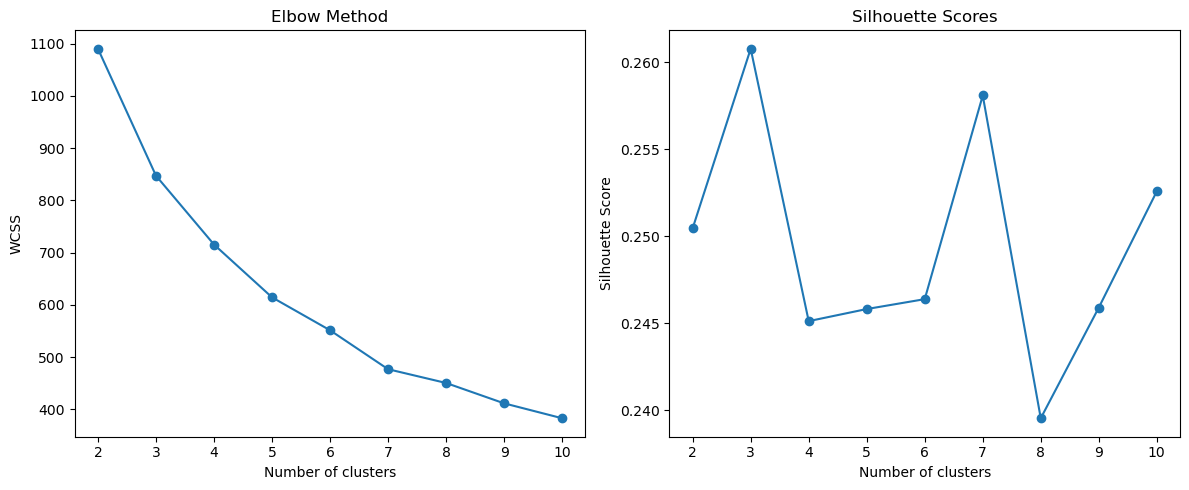


Performing clustering with 4 clusters...

Analyzing and visualizing results...

=== Cluster Statistics ===
               Age  AnnualIncome  SpendingScore  OnlineFrequency
Cluster                                                         
0        44.853147     37.506881      41.587413         3.237762
1        42.252252     60.845627      77.873874         5.045045
2        44.283019     41.476711      47.452830         7.688679
3        45.132353     59.153925      31.602941         4.558824


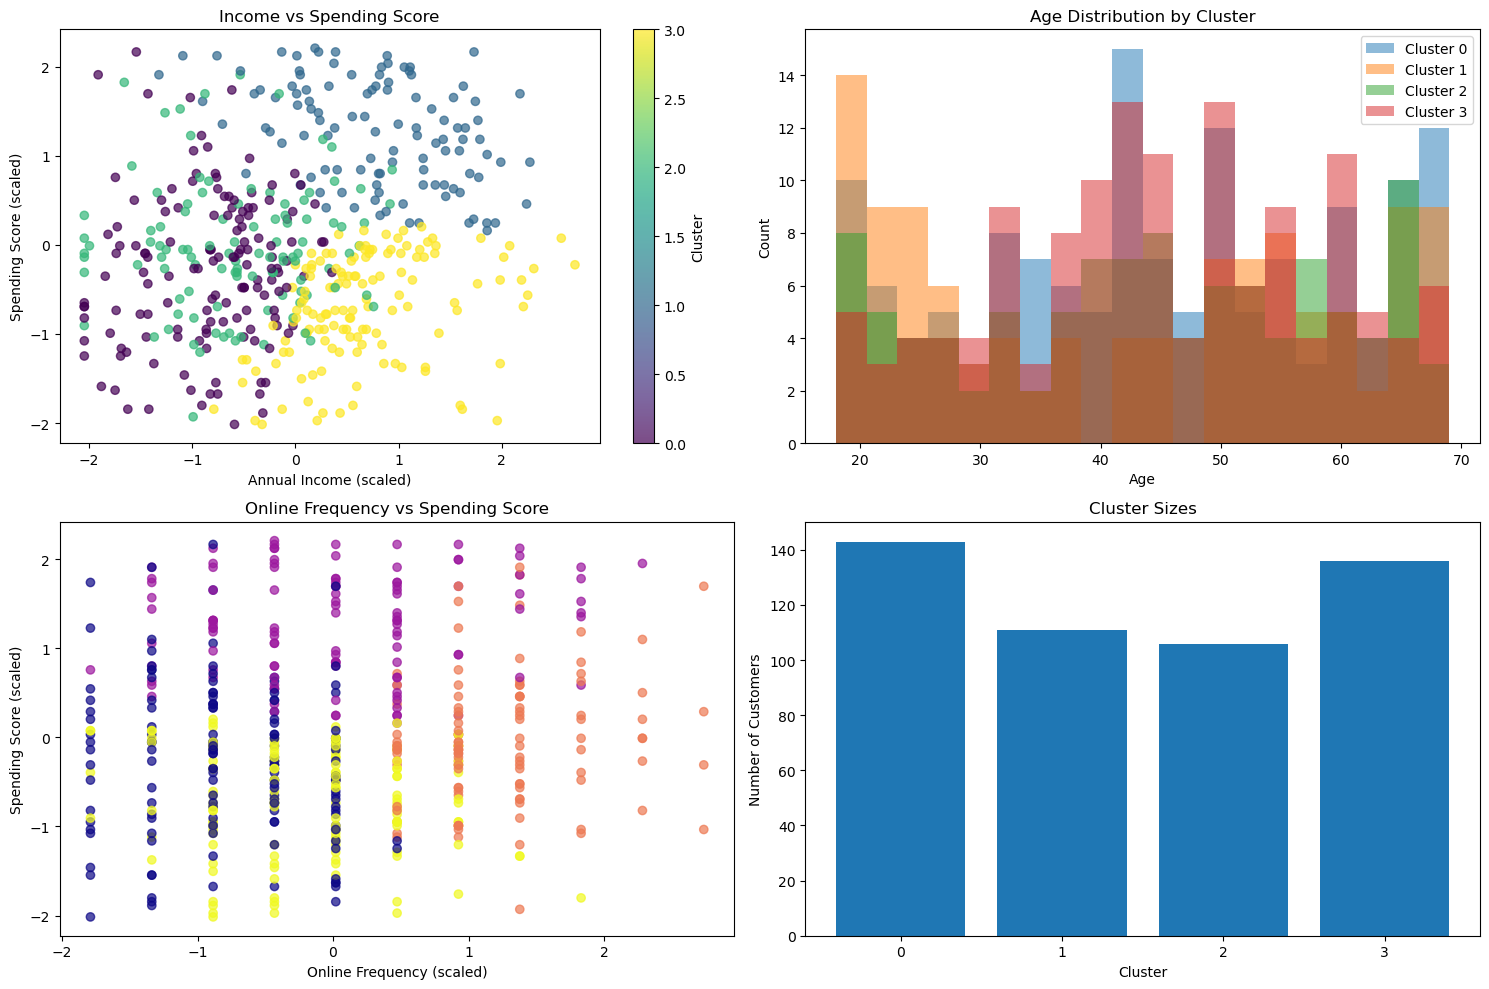


Clustered data saved to 'clustered_customers.csv'

=== Project Completed Successfully ===


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy import stats
import os
import warnings

# Configure environment to prevent warnings
warnings.filterwarnings('ignore')
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'

# Set random seed for reproducibility
np.random.seed(42)

def generate_customer_data(num_customers=300):
    """Generate synthetic customer data with realistic clusters"""
    # Base data generation
    ages = np.random.randint(18, 70, size=num_customers)
    incomes = np.random.normal(50, 15, num_customers).clip(20, 120)
    spending_scores = np.random.randint(1, 101, size=num_customers)
    online_freq = np.random.poisson(5, size=num_customers).clip(1, 20)
    
    # Create artificial clusters
    mask1 = (ages < 30) & (incomes > 60)
    spending_scores[mask1] = np.random.randint(70, 96, size=mask1.sum())
    
    mask2 = (ages >= 30) & (ages < 50) & (incomes < 60)
    spending_scores[mask2] = np.random.randint(20, 50, size=mask2.sum())
    
    mask3 = (ages >= 60)
    spending_scores[mask3] = np.random.randint(40, 70, size=mask3.sum())
    
    return pd.DataFrame({
        'CustomerID': np.arange(1, num_customers + 1),
        'Age': ages,
        'AnnualIncome': incomes,
        'SpendingScore': spending_scores,
        'OnlineFrequency': online_freq
    }, dtype=np.float64)

def explore_and_clean_data(df):
    """Perform data exploration and cleaning"""
    print("\n=== Data Overview ===")
    print(df.head())
    
    print("\n=== Data Information ===")
    print(df.info())
    
    print("\n=== Descriptive Statistics ===")
    print(df.describe())
    
    print("\n=== Missing Values ===")
    print(df.isnull().sum())
    
    numeric_cols = ['Age', 'AnnualIncome', 'SpendingScore', 'OnlineFrequency']
    z_scores = stats.zscore(df[numeric_cols])
    outliers = (np.abs(z_scores) > 3).any(axis=1)
    print(f"\nOutliers detected: {outliers.sum()}")
    
    return df[~outliers].copy()

def prepare_features(df):
    """Prepare and scale features for clustering"""
    features = df[['AnnualIncome', 'SpendingScore', 'OnlineFrequency']]
    scaler = StandardScaler()
    return scaler.fit_transform(features), features

def find_optimal_clusters(data, max_k=10):
    """Determine optimal clusters using elbow method and silhouette score"""
    wcss = []
    silhouette_scores = []
    
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
        
        if k > 1:
            silhouette_scores.append(silhouette_score(data, kmeans.labels_))
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(2, max_k + 1), wcss, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
    plt.title('Silhouette Scores')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    
    plt.tight_layout()
    plt.show()
    
    return wcss, silhouette_scores

def perform_clustering(data, n_clusters=4):
    """Perform K-Means clustering"""
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    return kmeans.fit_predict(data), kmeans

def analyze_and_visualize(df, clusters, features):
    """Analyze and visualize clustering results"""
    df['Cluster'] = clusters
    
    print("\n=== Cluster Statistics ===")
    print(df.groupby('Cluster')[['Age', 'AnnualIncome', 'SpendingScore', 'OnlineFrequency']].mean())
    
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 2, 1)
    scatter = plt.scatter(features[:, 0], features[:, 1], c=clusters, cmap='viridis', alpha=0.7)
    plt.title('Income vs Spending Score')
    plt.xlabel('Annual Income (scaled)')
    plt.ylabel('Spending Score (scaled)')
    plt.colorbar(scatter, label='Cluster')
    
    plt.subplot(2, 2, 2)
    for cluster in sorted(df['Cluster'].unique()):
        plt.hist(df[df['Cluster'] == cluster]['Age'], bins=20, alpha=0.5, label=f'Cluster {cluster}')
    plt.title('Age Distribution by Cluster')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.legend()
    
    plt.subplot(2, 2, 3)
    plt.scatter(features[:, 2], features[:, 1], c=clusters, cmap='plasma', alpha=0.7)
    plt.title('Online Frequency vs Spending Score')
    plt.xlabel('Online Frequency (scaled)')
    plt.ylabel('Spending Score (scaled)')
    
    plt.subplot(2, 2, 4)
    cluster_counts = df['Cluster'].value_counts().sort_index()
    plt.bar(cluster_counts.index.astype(str), cluster_counts.values)
    plt.title('Cluster Sizes')
    plt.xlabel('Cluster')
    plt.ylabel('Number of Customers')
    
    plt.tight_layout()
    plt.show()
    
    return df

def main():
    print("Generating customer data...")
    customer_data = generate_customer_data(500)
    
    print("\nExploring and cleaning data...")
    clean_data = explore_and_clean_data(customer_data)
    
    print("\nPreparing features for clustering...")
    scaled_features, original_features = prepare_features(clean_data)
    
    print("\nDetermining optimal number of clusters...")
    find_optimal_clusters(scaled_features)
    
    optimal_clusters = 4
    print(f"\nPerforming clustering with {optimal_clusters} clusters...")
    cluster_labels, kmeans_model = perform_clustering(scaled_features, optimal_clusters)
    
    print("\nAnalyzing and visualizing results...")
    clustered_data = analyze_and_visualize(clean_data, cluster_labels, scaled_features)
    
    clustered_data.to_csv('clustered_customers.csv', index=False)
    print("\nClustered data saved to 'clustered_customers.csv'")
    print("\n=== Project Completed Successfully ===")

if __name__ == "__main__":
    main()